# Upload Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv("Carseats.csv")

Feature	                                 Description

Sales	      ----->          Unit sales (in thousands) at each location

CompPrice	     ----->       Price charged by competitor at each location

Income	         ----->       Community income level (in thousands of dollars)

Advertising	    ----->        Local advertising budget for company at each location (in thousands of dollars)

Population	    ----->        Population size in region (in thousands)

Price	        ----->        Price company charges for car seats at each site

ShelveLoc	   ----->         A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

Age	              ----->      Average age of the local population

Education	   ----->         Education level at each location

Urban	   ----->             A factor with levels No and Yes to indicate whether the store is in an urban or rural

US	    ----->                A factor with levels No and Yes to indicate whether the store is in the US or not

# Reading Dataset

In [6]:
data.head(15)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [7]:
data.shape

(400, 11)

In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Check if there is any Null values

In [9]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Encoding

### At this stage we start converting any object feature to a numeric one to be suitable for the modeling stage

### We will use labelEncoding method

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
data['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])

#### Checking if all the dataset are converted

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


# Features Separating 

In [14]:
x = data.drop(['US'], axis=1)
y = data['US']

In [15]:
y.value_counts()

1    258
0    142
Name: US, dtype: int64

#### X contains the expected target values we need to predict later

#### Y contains the target values

# Splitting the Dataset 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

### we split the data 75% to be trained and 25% to test on

# Modeling with Decision tree

### Start fitting the training and testing data to the model 

### Then saving the model predictions to a variable to compare it later

In [17]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

In [18]:
from sklearn import tree

### Printing visualization

In [19]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_3 <= 4.36
|   |--- feature_3 <= 2.33
|   |   |--- feature_3 <= 0.19
|   |   |   |--- feature_4 <= 30.90
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  30.90
|   |   |   |   |--- feature_2 <= 103.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  103.95
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  0.19
|   |   |   |--- feature_4 <= 279.56
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  279.56
|   |   |   |   |--- class: 0
|   |--- feature_3 >  2.33
|   |   |--- feature_1 <= 118.23
|   |   |   |--- class: 1
|   |   |--- feature_1 >  118.23
|   |   |   |--- feature_7 <= 50.83
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  50.83
|   |   |   |   |--- class: 1
|--- feature_3 >  4.36
|   |--- feature_4 <= 378.84
|   |   |--- feature_2 <= 43.18
|   |   |   |--- feature_1 <= 137.70
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  137.70
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  43.18
|

### Applying Plot_tree

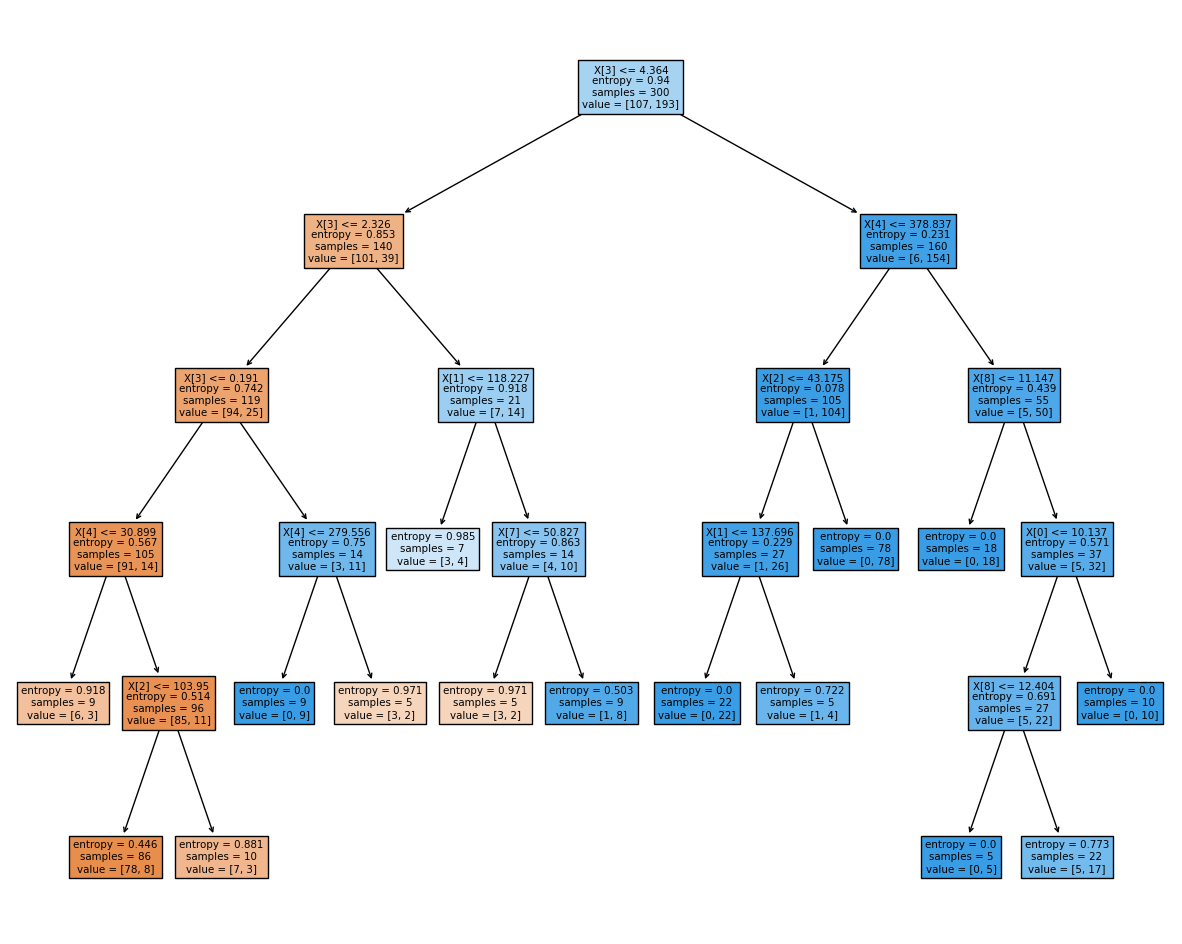

In [20]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT , filled=True);

### Comparing the actual data with the predicting

In [21]:
d3 = pd.DataFrame({"Y_TEST":y_test,"Y_Pred": y_pred_DT})
d3

,Y_TEST,Y_Pred
184,1,1
6,0,0
61,0,0
312,1,1
100,1,1
...,...,...
392,1,1
63,1,1
105,1,1
318,1,1


In [22]:
DTAcc = DT.score(x_train,y_train)

# logistical regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train , y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
LRAcc= lr.score(x_train , y_train)

### Create Accuracy Comparison Table

In [27]:
compare = pd.DataFrame({'Model': ['Decision Tree','LogisticRegression'],  
                        'Accuracy': [ DTAcc*100, LRAcc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\zee52\AppData\Local\Temp\ipykernel_37924\191893920.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Decision Tree,90.666667
LogisticRegression,88.666667
